In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

### Exercise H62.1: Long short-term memory (LSTM)

In this exercise we will use an LSTM for classifying a simple number series. The goal is to detect whether the sum of all the elements in the series is greater or equal to 100 (=class 1) or less (=class 0).

(a) Create the train and validation data as follows:
* Draw 10,000 different series, each consisting of 30 integer numbers (i.e. digits) from 0 to 9, where each digit is uniformly distributed and independent from the others, that is $ x1^\alpha\,...., x30^\alpha\ ∈ { 0,1,.... 9}^ (30) $
* A series gets the label 1 if its sum is greater or equal to 100 and the label 0 otherwise.
* Use 8,000 series as training set and 2,000 series as your validation set.


In [2]:
#create 10000 samples of 30 integer numbers from 0 to 9, where each digit is uniformly distributed and independent from the others

# Hint: use np.random.randint
series = np.random.randint(0, 10, (10000, 30))

# Check the sum of the digits 
sum = np.sum(series, axis=1)
label = np.where(sum >= 100, 1, 0)

# Create an array with the series and the label
data = np.column_stack((series, label))

# Training and test data
x_train, y_train = data[:8000, :-1], data[:8000, -1]
x_test, y_test = data[8000:, :-1], data[8000:, -1]

Build a recurrent network for number series classification as follows:
* The network is composed of 200 LSTM cells yielding an output vector h(t) in each time step t of the 30 time steps within a sequence.
* On top of the LSTM layer there is a single linear output neuron (receiving input from the 200 LSTM cells. The output neuron uses the logistic sigmoidal as its non-linearity,
i.e, y(h(t)) ∈ (0, 1). y(h(30)). The output neuron’s activity should be interpreted as the probability that the sum of the number series is greater or equal to 100.
Hints for Keras users: Apply a Dense layer with one output neuron and sigmoid activation after the LSTM layer.

In [18]:
# create a long short-term memory network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name='Adam'),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

# Fitting the RNN to the Training set
histoy_regressor = regressor.fit(x_train, y_train, epochs = 60, batch_size = 50, verbose=False )

/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_45644/2157335516.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


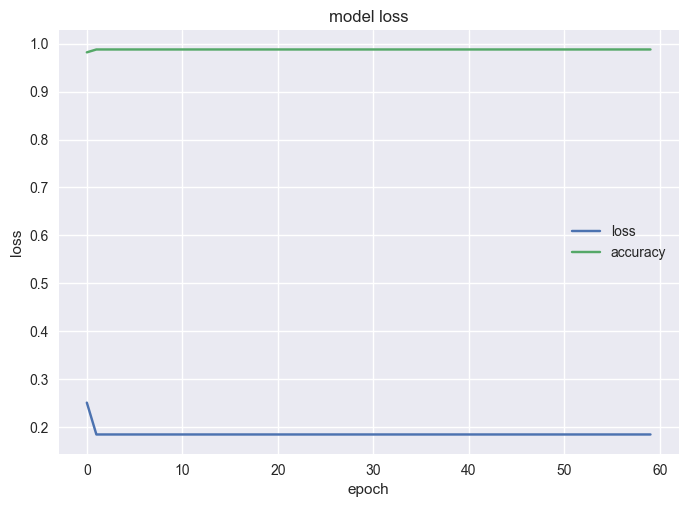

In [20]:

#plot the loss and accuracy

plt.style.use('seaborn')

plt.plot(histoy_regressor.history['loss'])
plt.plot(histoy_regressor.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'])
plt.show()